## Exploración de conjuntos de datos

Recordemos las principales subdisciplinas de la Estadística

- Decidir qué medir y cómo medirlo: **Diseño de experimentos**.
- Recopilar y organizar datos: **Data Crunching**.
- Inspeccionar y visualizar datos: **Estadística Descriptiva / Análisis exploratorio**.
- Analizar e interpretar los datos: **Inferencia Estadística**.

Tras el trabajo con `pandas`, podemos cargar los datos, y con un poco de esfuerzo, asegurarnos de que los datos son correctos.
Ahora queremos visualizar los datos para comprobar si se cumplen nuestras expectativas sobre el conjunto de datos.
La visualización nos debería ayudar a detectar valores atípicos, patrones estacionales, relaciones de monotonía o linealidad entre pares de variables, y otras muchas características importantes del conjunto de datos.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Cargamos los dataframes con los que haremos los ejemplos...

In [2]:
#Características de unos cuantos coches
mtcars=pd.read_csv('mtcars.csv')

Vamos a cargar un archivo con datos de coeficientes hidrodinámicos de unos cuantos yates medidos en canal de ensayos.

https://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics

In [3]:
#Datos de coeficientes hidrodinámicos de unos cuantos yates
# medidos en canal de ensayos
yacht = pd.read_csv('yacht_hydrodynamics.csv')


Realizamos un análisis rápido:

- yacht.head() muestra las primeras líneas
- yacht.shape  cuenta el número de registros, y el número de columnas (cuántos valores se han medido para cada registro)
- yacht.info() muestra el tipo de datos de cada columna

In [4]:
yacht.head()

center  prismatic  LD ratio  BD ratio  LB ratio  Froude  resistence
0    -2.3      0.568      4.78      3.99      3.17   0.125        0.11
1    -2.3      0.568      4.78      3.99      3.17   0.150        0.27
2    -2.3      0.568      4.78      3.99      3.17   0.175        0.47
3    -2.3      0.568      4.78      3.99      3.17   0.200        0.78
4    -2.3      0.568      4.78      3.99      3.17   0.225        1.18

In [5]:
print(yacht.head())
print('-----')
print(yacht.shape)
print('-----')
print(yacht.info())

   center  prismatic  LD ratio  BD ratio  LB ratio  Froude  resistence
0    -2.3      0.568      4.78      3.99      3.17   0.125        0.11
1    -2.3      0.568      4.78      3.99      3.17   0.150        0.27
2    -2.3      0.568      4.78      3.99      3.17   0.175        0.47
3    -2.3      0.568      4.78      3.99      3.17   0.200        0.78
4    -2.3      0.568      4.78      3.99      3.17   0.225        1.18
-----
(308, 7)
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   center      308 non-null    float64
 1   prismatic   308 non-null    float64
 2   LD ratio    308 non-null    float64
 3   BD ratio    308 non-null    float64
 4   LB ratio    308 non-null    float64
 5   Froude      308 non-null    float64
 6   resistence  308 non-null    float64
dtypes: float64(7)
memory usage: 17.0 KB
None


In [6]:
mtcars.head()

model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

In [7]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


Transformamos las columnas con variables categóricas ('vs','carb','am', 'cyl', 'gear') al tipo correcto

In [8]:
a_transformar=['vs','carb','am','cyl','gear']

In [9]:
for columna in a_transformar:
    mtcars[columna] = mtcars[columna].astype('category')

In [10]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   model   32 non-null     object  
 1   mpg     32 non-null     float64 
 2   cyl     32 non-null     category
 3   disp    32 non-null     float64 
 4   hp      32 non-null     int64   
 5   drat    32 non-null     float64 
 6   wt      32 non-null     float64 
 7   qsec    32 non-null     float64 
 8   vs      32 non-null     category
 9   am      32 non-null     category
 10  gear    32 non-null     category
 11  carb    32 non-null     category
dtypes: category(5), float64(5), int64(1), object(1)
memory usage: 2.7+ KB


# Gráficas con pandas y matplotlib

Pandas (a través de matplotlib) incorpora una serie de funciones gráficas que pueden ser útiles cuando queremos realizar un gráfico sencillo.
Si no se le da más instrucciones, visualiza una gráfica con la columna índice en el eje de abscisas y todas las demás columnas en las ordenadas. Este tipo de gráfica puede resultar útil para detectar fallos al importar, pero a menudo es poco iluminador, especialmente si las columnas se miden en unidades muy distintas.

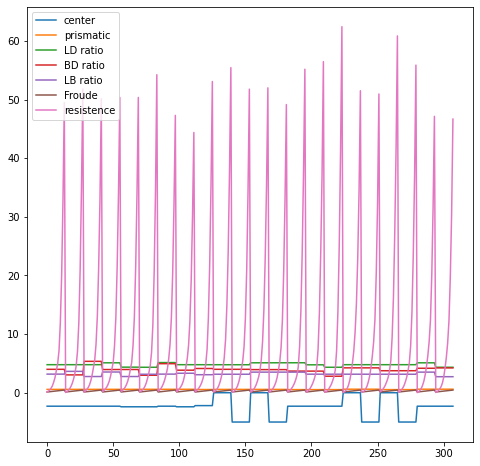

In [11]:
yacht.plot(figsize=(8,8))
plt.show()

Los gráficos de barras se obtienen con la función plot.bar. Son útiles para visualizar los valores de cada una de las observaciones

<AxesSubplot:>

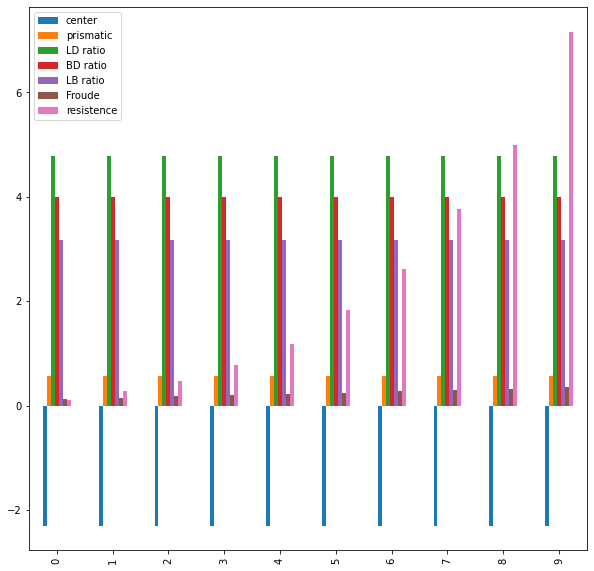

In [12]:
#Al poner yacht.iloc[:10] dibujamos solo los 10 primeros registros
yacht.iloc[:10].plot.bar(figsize=(10,10))

Como puede observarse __estas funciones gráficas sólo responden a las variables continuas__. Esta es una primera (y obvia) limitación.

---
## Ejercicio
- Visualizar:
    - La serie de las variables mpg, wt, hp 
    - Con una gráfica de barras, los valores de las columnas mpg, wt, hp de los 5 primeros coches

## Distribución de variables continuas 1-d:
Si queremos visualizar la distribución de una variable continua, normalmente usaremos alguna de estas funciones
- ‘hist’ para histogramas.
- ‘kde’ o 'density' para gráficas de densidad (la variante continua del histograma, recordad que vimos que los histogramas son muy sensibles a la distribución de los valores en cajas).
- ‘box’ para  boxplot.


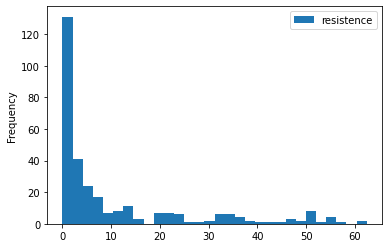

In [13]:
yacht.plot.hist(y = ['resistence'], bins = 30)
plt.show()
## Pandas puede mostrar varias variables en el mismo histograma

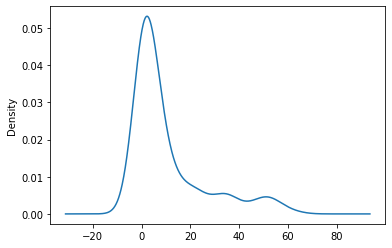

In [14]:
yacht['resistence'].plot.density()
plt.show()

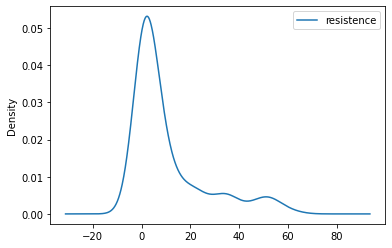

In [15]:
yacht.plot.density(y = 'resistence')
plt.show()

Los **diagramas de cajas** (**boxplot**) muestran una caja delimitada por el primer y el tercer cuartil, con una línea interior a la caja que marca la mediana. Los dos *bigotes* (*whiskers*) contienen al resto de los datos, excepto los **datos atípicos** (**outliers**), que son las observaciones que distan del primer y tercer cuartil más de un RIC (rango intercuartílico, la longitud de la caja) y medio.

['Diagrama de caja' en la wikipedia](https://es.wikipedia.org/wiki/Diagrama_de_caja)

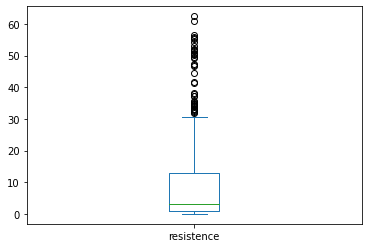

In [16]:
yacht.plot.box(y = 'resistence')
plt.show()

Puede ser útil, para empezar, dibujar un diagrama de las *marginales* de cada variable por separado.

No handles with labels found to put in legend.


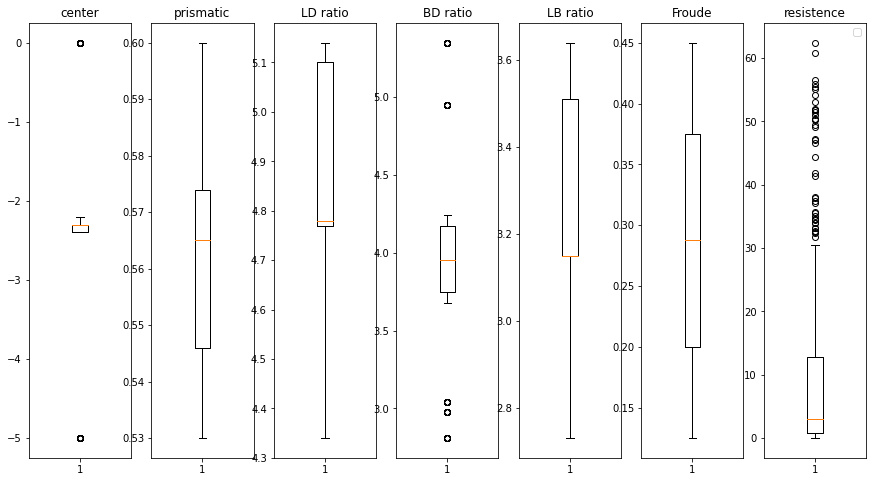

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=len(yacht.columns), figsize=(15,8))
for ax,col in zip(axes, yacht.columns):
    ax.boxplot(yacht[col])
    ax.set_title(col)

plt.legend()
plt.show()

Podemos hacer un histograma en vez de un boxplot:

No handles with labels found to put in legend.


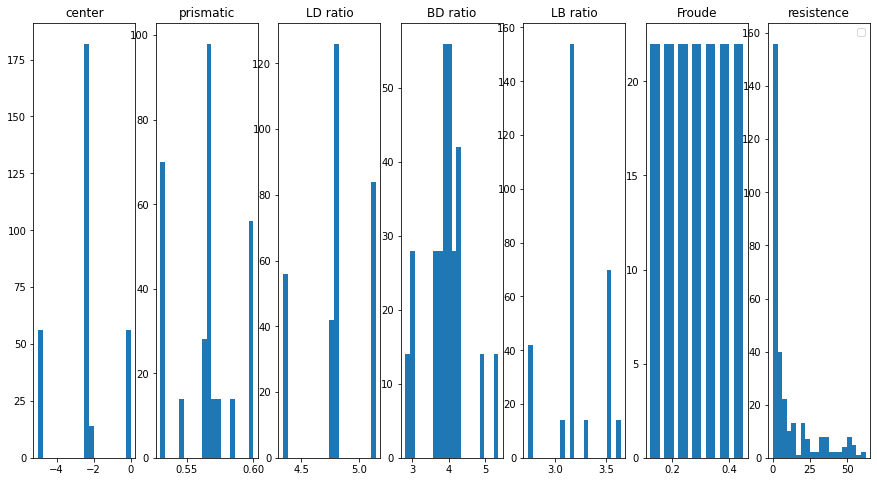

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=len(yacht.columns), figsize=(15,8))
for ax,col in zip(axes, yacht.columns):
    ax.hist(yacht[col], bins=20)
    ax.set_title(col)

plt.legend()
plt.show()

## Distribución de variables continuas 2-d
Podemos visualizar el histograma en dos dimensiones por medio de _un diagrama de dispersión_ (_scatter plot_)

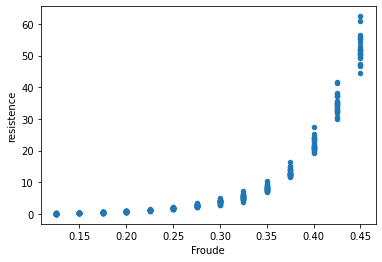

In [19]:
yacht.plot.scatter(y = 'resistence', x = 'Froude')
plt.show()

La librería [seaborn](https://seaborn.pydata.org/examples/) permite dibujar las relaciones entre cada par de variables (como *scatter plots*).
En la diagonal aparecen los histogramas.

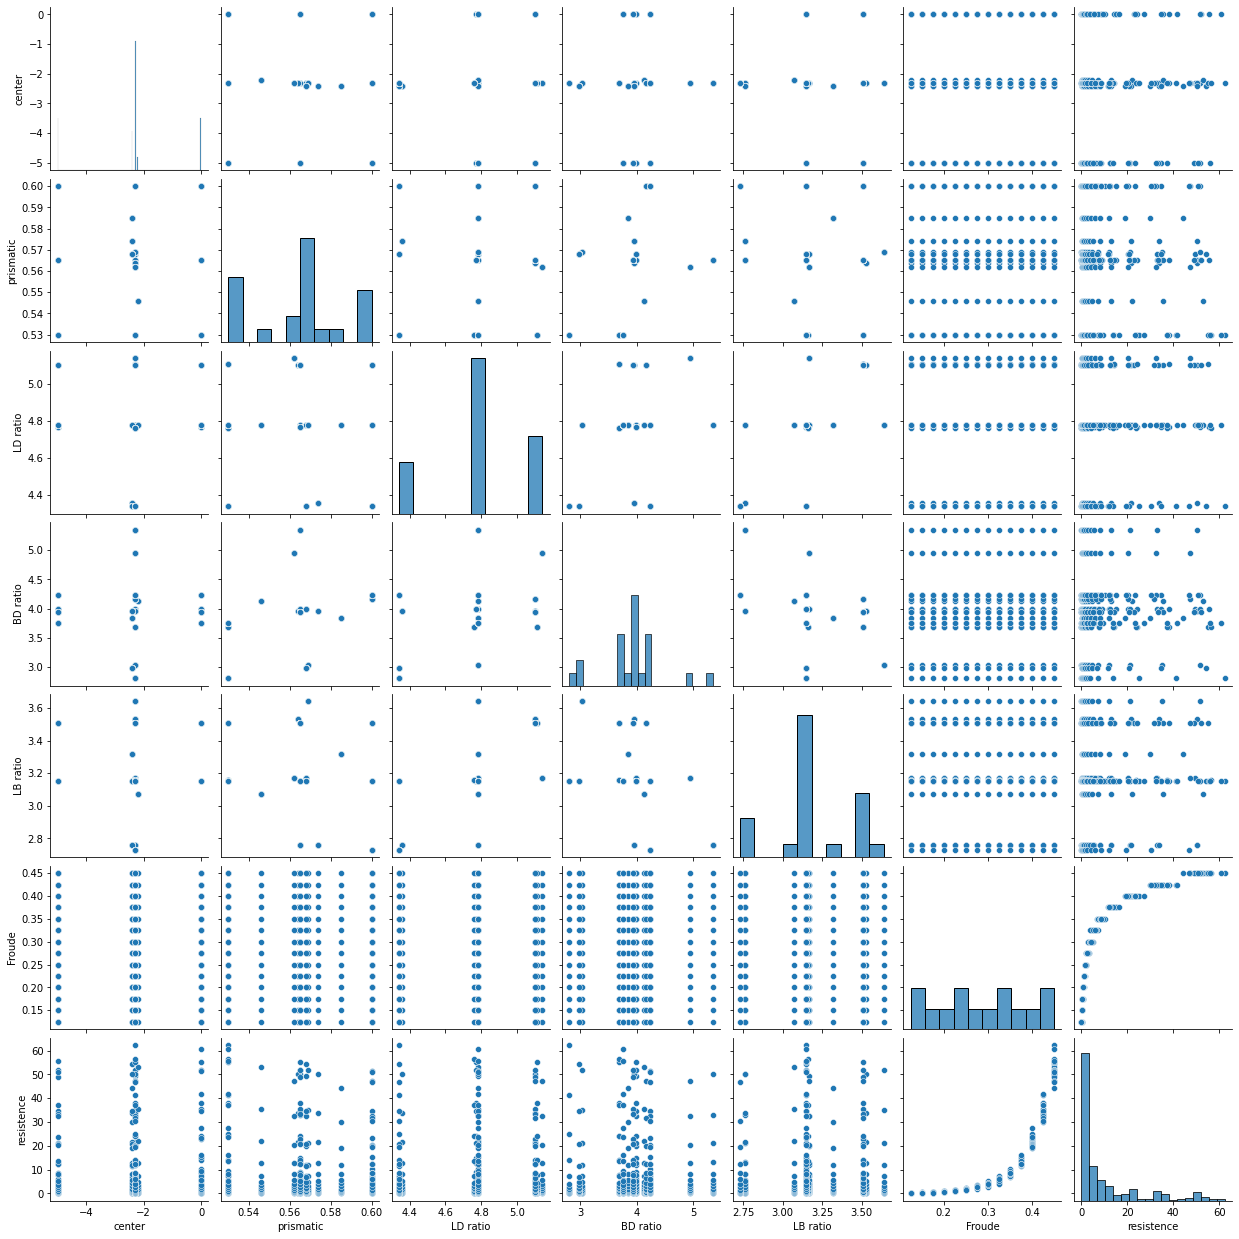

In [20]:
sns.pairplot(yacht)

---
## Ejercicio
Sobre el dataset mtcars, visualizar:

- La gráfica de densidad de la variable hp
- La relación que existe entre las variables mpg y wt
- ¿Hay una relación clara entre transmisión manual (am=1) o automática (am=0), y consumo del vehículo?

## Series temporales con un patrón estacional

Vamos a hacer unas gráficas de la extensión del hielo en los océanos ártico y antártico, y luego os pediremos que hagáis un análisis similar para otra serie temporal con patrón estacional: el oleaje en una boya de la Bahía de Cádiz.

In [21]:
#Extensión del hielo en los polos
ice = pd.read_csv('seaice.csv')
ice.head()

Year  Month  Day  Extent  Missing  \
0  1978     10   26  10.231      0.0   
1  1978     10   28  10.420      0.0   
2  1978     10   30  10.557      0.0   
3  1978     11    1  10.670      0.0   
4  1978     11    3  10.777      0.0   

                                         Source Data hemisphere  
0  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north  
1  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north  
2  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north  
3  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north  
4  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north

**Pregunta**: mirando el output de ``describe(include='all')``: ¿qué puedes decir sobre las columnas "Missing" y "hemisphere"?

In [22]:
ice.describe(include='all')

Year         Month           Day        Extent  Missing  \
count   23860.000000  23860.000000  23860.000000  23860.000000  23860.0   
unique           NaN           NaN           NaN           NaN      NaN   
top              NaN           NaN           NaN           NaN      NaN   
freq             NaN           NaN           NaN           NaN      NaN   
mean     1998.851635      6.550293     15.742917     11.603068      0.0   
std         9.951976      3.447684      8.802258      4.586068      0.0   
min      1978.000000      1.000000      1.000000      2.264000      0.0   
25%      1991.000000      4.000000      8.000000      7.747750      0.0   
50%      1999.000000      7.000000     16.000000     12.297000      0.0   
75%      2007.000000     10.000000     23.000000     15.197250      0.0   
max      2015.000000     12.000000     31.000000     20.201000      0.0   

                                              Source Data hemisphere  
count                                               23860      23860  
unique                                              23860          2  
top     ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north  
freq                                                    1      11930  
mean                                                  NaN        NaN  
std                                                   NaN        NaN  
min                                                   NaN        NaN  
25%                                                   NaN        NaN  
50%                                                   NaN        NaN  
75%                                                   NaN        NaN  
max                                                   NaN        NaN

Los datos contienen columnas para el año, mes y día. Puede ser interesante crear un campo ``Date`` que contenga toda la fecha.

In [23]:
ice['Date'] = pd.to_datetime(ice[['Year','Month','Day']])
ice.head()

Year  Month  Day  Extent  Missing  \
0  1978     10   26  10.231      0.0   
1  1978     10   28  10.420      0.0   
2  1978     10   30  10.557      0.0   
3  1978     11    1  10.670      0.0   
4  1978     11    3  10.777      0.0   

                                         Source Data hemisphere       Date  
0  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north 1978-10-26  
1  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north 1978-10-28  
2  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north 1978-10-30  
3  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north 1978-11-01  
4  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north 1978-11-03

Parece conveniente separar los datos del hemisferio norte y del hemisferio sur.

In [24]:
icen = ice[ice.hemisphere=='north']
ices = ice[ice.hemisphere=='south']

<AxesSubplot:>

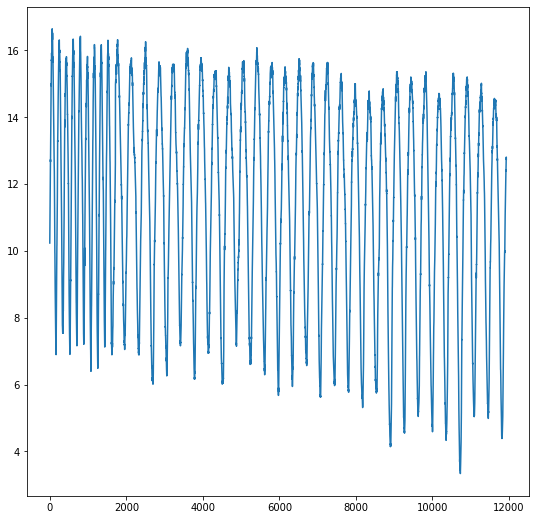

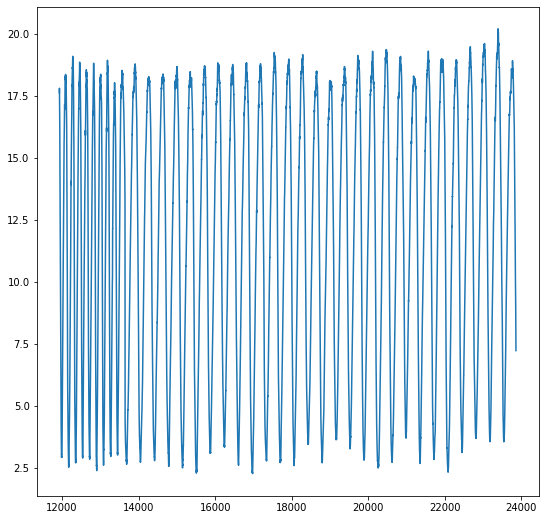

In [25]:
plt.figure(figsize=(9,9))
icen.Extent.plot()
plt.figure(figsize=(9,9))
ices.Extent.plot()

Es difícil detectar la tendencia histórica cuando la variación inter-anual es tan fuerte, así que dibujamos los datos de un sólo mes:

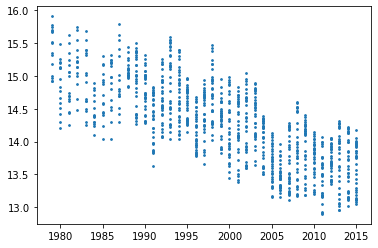

In [26]:
plt.scatter(x=icen[icen.Month==1].Year, y=icen[icen.Month==1].Extent, s=3)

Otra forma de representar los datos, usando [Seaborn](https://seaborn.pydata.org/examples/) y boxplot

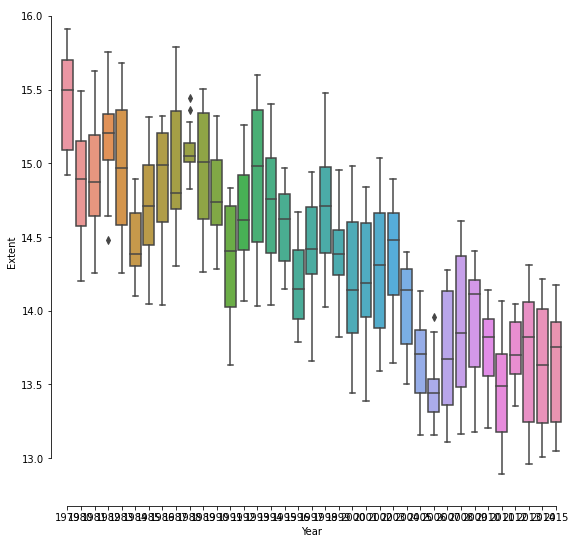

In [27]:
plt.figure(figsize=(9,9))
sns.boxplot(x="Year", y="Extent", data=icen[icen.Month==1])
sns.despine(offset=10, trim=True)

Los datos de hielo del hemisferio sur no parecen tan dramáticos:

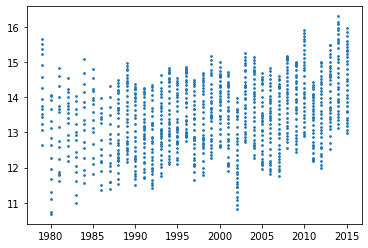

In [28]:
plt.scatter(x=ices[ices.Month==6].Year, y=ices[ices.Month==6].Extent, s=3)

Parece que el hielo del Ártico disminuye en extensión (y en grosor), pero el del Antártico aumenta en extensión, y el balance neto es negativo:

https://www.nasa.gov/content/goddard/nasa-study-shows-global-sea-ice-diminishing-despite-antarctic-gains

La extensión de hielo es importante porque afecta a la cantidad de radiación solar reflejada y absorbida (el hielo refleja un 50-70%, el agua un 10%). El volumen de hielo es más importante en lo que afecta a la subida del nivel del mar. Para entender realmente el efecto del cambio climático, hay que entender además que la capa de hielo antártica recibe contribuciones de glaciares antárticos que se derriten, y ha aumentado en parte gracias a esas contribuciones a pesar de que el mar en esas regiones se está calentando.

https://www.theguardian.com/environment/2021/apr/30/antarctic-doomsday-glacier-may-be-melting-faster-than-was-thought

> He said if the glacier’s “pinning points” were lost in the next few years it would start to flow faster “and put more ice into the sea”. But he said the question no one could currently answer was exactly how much extra ice will go into the sea if the glacier begins to break up.

https://skepticalscience.com/arctic-antarctic-sea-ice.htm

El clima es además un sistema complejo y caótico, que hace difícil predecir exactamente qué ocurrirá ante perturbaciones importantes: el calentamiento del ártico podría derretir los glaciares de Groenlandia, lo que rompería la corriente del golfo y enfriaría el norte de Europa... por ejemplo.

## Ejercicio

Más abajo se cargan datos de cierta boya de medición. Los datos han sido modificados porque no tenemos permiso para publicarlos, pero son similares a los datos reales:

 - Investiga si la intensidad del oleaje y del viento son más fuertes en algunos meses, o a algunas horas. Si es así: ¿cuándo esperas tener mayor producción con un generador eólico, o hundimotriz?
     - Hm0    : Altura significante Espectral                  (m)
     - VelV   : Velocidad Media del Viento                     (m/s)

In [29]:
simar=pd.read_csv('SIMAR_fake.csv')
simar.head()

AA  MM  DD  HH  Hm0  Tm02    Tp   DirM  Hm0_V  DirM_V  Hm0_F1  Tm02_F1  \
0  2006  12  13  15  0.3  10.9  12.1  272.0    NaN     NaN     NaN      NaN   
1  2006  12  13  18  0.3  10.3  12.0  267.0    NaN     NaN     NaN      NaN   
2  2006  12  13  21  0.3  10.3  11.8  268.0    NaN     NaN     NaN      NaN   
3  2006  12  14   0  0.3  10.7  11.6  271.0    NaN     NaN     NaN      NaN   
4  2006  12  14   3  0.3  10.6  11.4  269.0    NaN     NaN     NaN      NaN   

   DirM_F1  Hm0_F2  Tm02_F2  DirM_F2  VelV  DirV  
0      NaN     NaN      NaN      NaN   NaN   NaN  
1      NaN     NaN      NaN      NaN   NaN   NaN  
2      NaN     NaN      NaN      NaN   NaN   NaN  
3      NaN     NaN      NaN      NaN   NaN   NaN  
4      NaN     NaN      NaN      NaN   NaN   NaN